In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data_output/red_flags.csv')
tender = pd.read_csv('../Data_input/tender.csv')
parties = pd.read_csv('../Data_input/parties.csv')

## Features derivation

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.shape

(1371, 18)

In [5]:
data.head()

,procuringEntity_name,NF003,NF010,NF016,NF018,NF026,NF027,NF031,NF042,NF044,NF047,NF059,NF061,NF062,NF063,RF cases,Total cases,Total RF
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,2,0,0,0,1,1,0,2,0,3,1,1,2,0,6,9,13
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0,0,0,0,0,0,0,24,0,49,0,0,0,0,57,109,73
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0,0,0,0,0,0,0,3,0,6,0,0,0,0,8,11,9
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,2,0,0,0,1,0,0,1,0,2,0,0,2,0,2,2,8


## Creación y análisis de nuevos grupos de Red Flags

Salidas de cada Red Flag
#### - NF003
    - Datos de fechas, duraciones en días
#### - NF010
    - Cantidades de dinero, valores de bienes
#### - NF011
    - Dinero
#### - NF025
    - Ocurrencias de éxito de entidades
#### - NF026
    - Formación de grupos por Id de entidades participantes y ganadoras
#### - NF027
    - Regiones, mayores ofertas por ubicaciones
#### - NF031
    - Dinero, pagos, presupuesto
#### - NF042, NF044, NF047
    - Falta de información personal para las ofertas
#### - NF059
    - Dinero
#### - NF061, 62, 63
    - Tiempo, tiempo, tiempo

## Nuevas categorías unidas

In [10]:
dinero = ['NF010','NF031','NF059', 'NF011', 'NF016']
tiempo = ['NF003','NF061','NF062','NF063']
informacion = ['NF042','NF044','NF047']
frecuencias = ['NF018','NF019','NF026','NF027']

In [11]:
total_ocurr = data['Total RF']
money = data[dinero].sum(axis=1) / total_ocurr
time = data[tiempo].sum(axis=1) / total_ocurr
information = data[informacion].sum(axis=1) / total_ocurr
frequencies = data[frecuencias].sum(axis=1) / total_ocurr

In [12]:
data_reduce = pd.concat([data,money,time,information,frequencies], axis=1)
data_reduce = pd.concat([data_reduce.iloc[:,0],data_reduce.iloc[:,-4:]], axis=1)
data_reduce.columns = ['entidades','money','time','information','frequencies']

In [13]:
data_reduce

,entidades,money,time,information,frequencies
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,0.111111,0.555556,0.555556,0.333333
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.000000,0.000000,0.669725,0.000000
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.000000,0.000000,0.818182,0.000000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,0.000000,2.000000,1.500000,1.000000
...,...,...,...,...,...
1366,junta parroquial de cuyuja,0.000000,0.000000,1.000000,0.000000
1367,junta parroquial la tola,0.000000,0.000000,1.000000,0.000000
1368,juntaparroquialbuenavista,0.000000,0.000000,1.333333,0.000000
1369,juntaparroquialsalango,0.000000,0.000000,1.000000,0.000000


## Método de codo

In [14]:
data_reduce.corr()

,money,time,information,frequencies
money,1.000000,0.139630,0.018426,0.191859
time,0.139630,1.000000,0.112841,0.772147
information,0.018426,0.112841,1.000000,0.134467
frequencies,0.191859,0.772147,0.134467,1.000000


In [15]:
X = data_reduce.iloc[:,1:]

In [16]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [17]:
X_norm = sc.transform(X)

In [18]:
clusters = np.arange(2,11)

In [19]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [20]:
eva = pd.DataFrame({"K": clusters, "inercia": inercias})

In [21]:
eva

,K,inercia
0,2,3493.968112
1,3,2529.747793
2,4,1732.640933
3,5,1432.353232
4,6,1174.346238
5,7,1038.254078
6,8,917.417547
7,9,794.567054
8,10,735.501716


<AxesSubplot:xlabel='K', ylabel='inercia'>

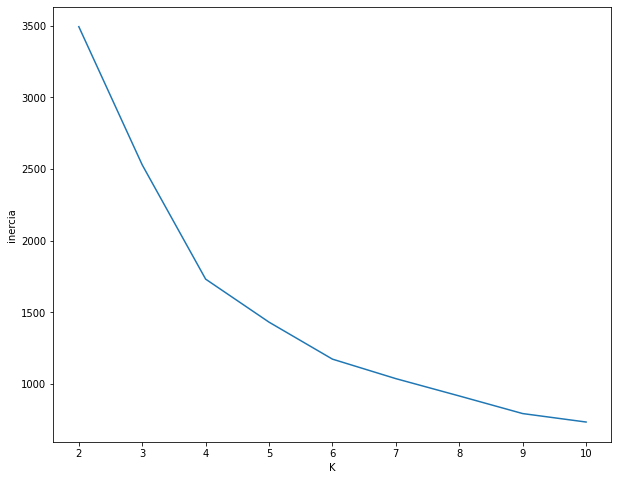

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

## Clustering

In [23]:
kmeans2 = KMeans(n_clusters=4, random_state=0)

In [24]:
kmeans2.fit(X_norm)

KMeans(n_clusters=4, random_state=0)

In [25]:
kmeans2.cluster_centers_

array([[-0.09968923, -0.2228171 , -1.32377631, -0.2158432 ],
       [ 0.03129586,  4.01045253,  0.51336171,  3.50311479],
       [ 8.37842733,  1.04185482,  0.30039743,  1.40045749],
       [-0.09809419, -0.19298301,  0.44676092, -0.16856464]])

In [26]:
data_reduce2=data_reduce.copy()

In [27]:
data_reduce2['cluster'] = kmeans2.labels_

In [28]:
data_reduce2.head()

,entidades,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,3
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,0.111111,0.555556,0.555556,0.333333,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.000000,0.000000,0.669725,0.000000,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.000000,0.000000,0.818182,0.000000,3
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,0.000000,2.000000,1.500000,1.000000,1


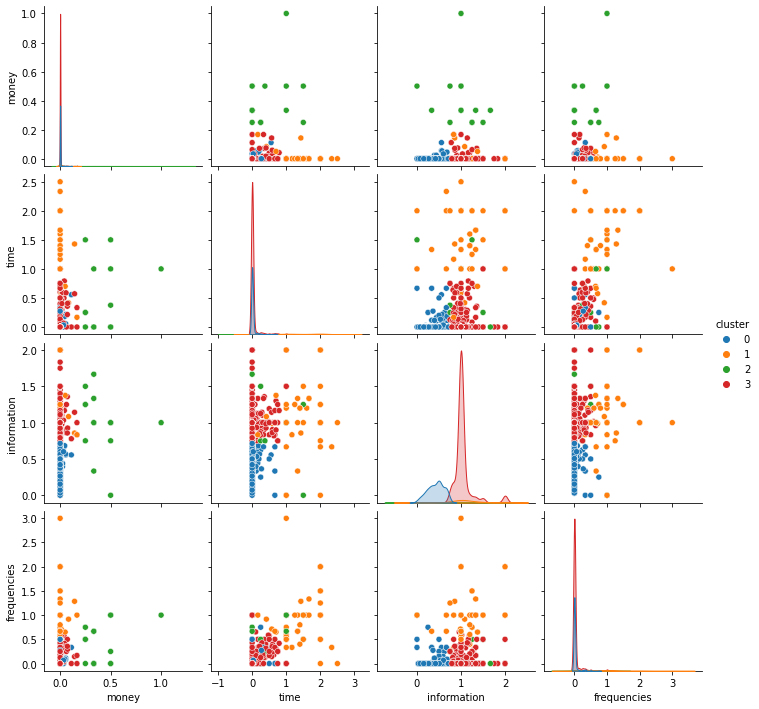

In [29]:
sns.pairplot(data_reduce2,hue="cluster", palette="tab10")

<AxesSubplot:xlabel='cluster', ylabel='money'>

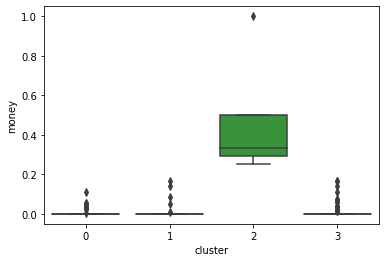

In [30]:
sns.boxplot(x='cluster', y='money', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='time'>

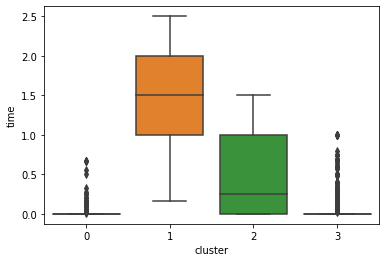

In [31]:
sns.boxplot(x='cluster', y='time', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='information'>

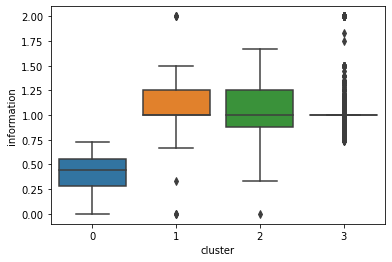

In [32]:
sns.boxplot(x='cluster', y='information', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='frequencies'>

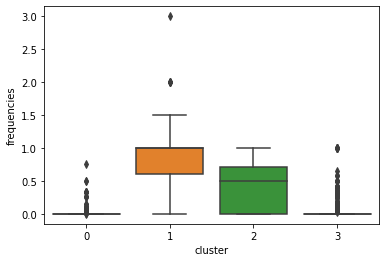

In [33]:
sns.boxplot(x='cluster', y='frequencies', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='frequencies'>

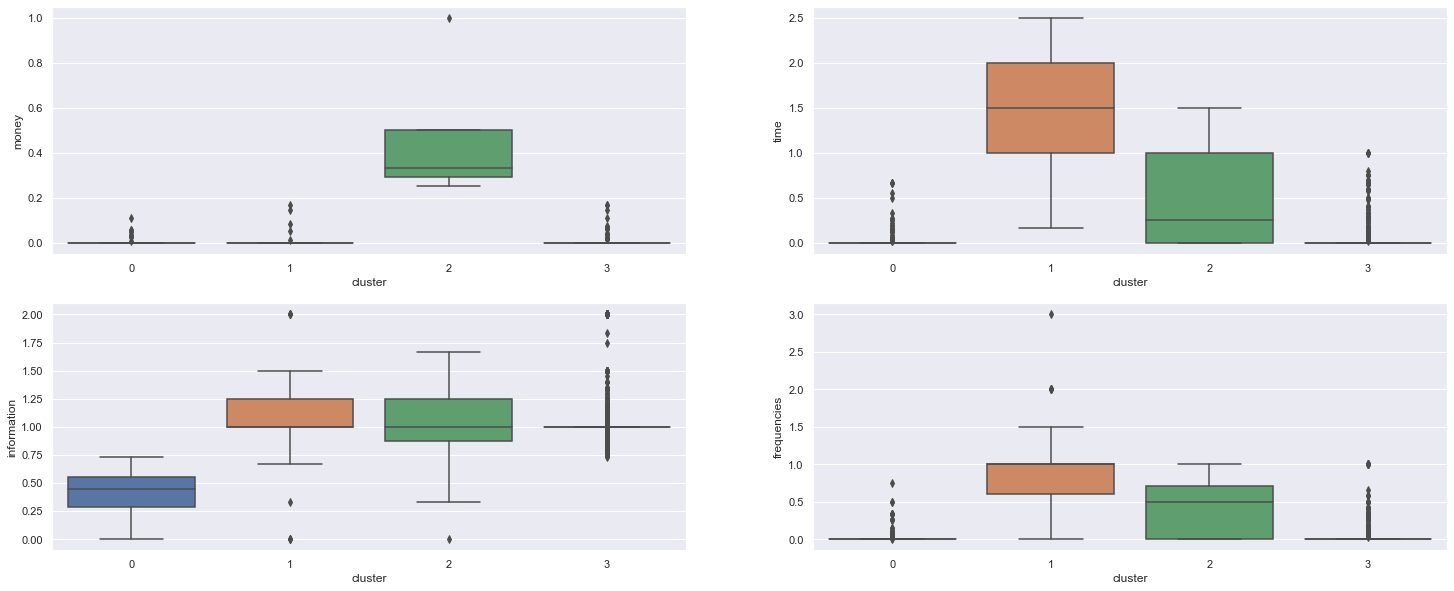

In [34]:
sns.set_theme(style = "darkgrid")
fig, axs = plt.subplots(2,2,figsize =(25,10))
sns.boxplot(x="cluster",y="money", data = data_reduce2,ax=axs[0,0])
sns.boxplot(x="cluster",y="time", data = data_reduce2,ax=axs[0,1])
sns.boxplot(x="cluster",y="information", data = data_reduce2,ax=axs[1,0])
sns.boxplot(x="cluster",y="frequencies", data = data_reduce2,ax=axs[1,1])

### Clustering 
- Cluster 0
    - Menor cantidad de red flags para money
    - Menor cantidad de red flags para time
    - Menor cantidad de red flags para information
    - Menor cantidad de red flags para frequencies
    - Conclusión: Cluster con menor cantidad de red flags para todos los features
- Cluster 1
    - Cantidad de red flags ligeramente baja
    - Mayor cantidad en red flags de tipo tiempo
    - En comparación de cluster 1 y 2, el cluster 1 es ligeramente más alto, debido a que el cluster 2 tiene una mayor distribución por debajo de su mediana en el feature de información.
    - Mayor cantidad de red flags en la frecuencia de participaciones
    - Conclusión: Cluster que contiene mayor cantidades de red flags entre todos sus features, mayor probabilidad corrupción
- Cluster 2
    - Mayor cantidad de red flags de money
    - Mayor parte de sus datos están por encima de los cluster 0 y 3, pero por debajo del cluster 1, quedando en la segunda posición de mayor probabilidad de corrupción
    - El 50% de sus datos se encuentran más bajos que el cluster 1, quedando en segundo posición considerando mayor corrupción
    - Mayor parte de sus datos están por encima de los cluster 0 y 3, pero por debajo del cluster 1, quedando en la segunda posición de mayor probabilidad de corrupción
    - Conclusión: El segundo con más probabilidad de corrupción
- Cluster 3
    - Por la cantidad de datos que se observan, queda como el segundo más alto en red flags de tipo money
    - Tercero con mayor probabilidad de corrupción con red flags de tipo time
    - Tercero con mayor probabilidad de corrupción con red flags de tipo information, debido a que la mayor parte de sus datos se concentran en la mediana, y solo los outliers quedan fuera.
    - En base a outliers, los datos son mayores en este cluster, en comparación al cluster 0, por lo que queda en el tercero con mayor probabilidad de corrupción
    - Conclusión: El tercero con más probabilidad de corrupción

|Cluster|Observación|
|---|---|
|0|Más baja cantidad de red flags cometidos|
|1|Más alta cantidad de red flags cometidos|
|2|Media-Alta cantidades de red flags cometidos|
|3|Media-Baja cantidades de red flags cometidos|

In [35]:
data_reduce2

,entidades,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,3
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,0.111111,0.555556,0.555556,0.333333,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.000000,0.000000,0.669725,0.000000,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.000000,0.000000,0.818182,0.000000,3
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,0.000000,2.000000,1.500000,1.000000,1
...,...,...,...,...,...,...
1366,junta parroquial de cuyuja,0.000000,0.000000,1.000000,0.000000,3
1367,junta parroquial la tola,0.000000,0.000000,1.000000,0.000000,3
1368,juntaparroquialbuenavista,0.000000,0.000000,1.333333,0.000000,3
1369,juntaparroquialsalango,0.000000,0.000000,1.000000,0.000000,3


In [36]:
buyers_info=parties.loc[parties['roles']=="buyer"]
buyers_info=buyers_info[["ocid","name","address_region"]]

In [37]:
buyers_info.columns=["ocid","entidades","address_region"]

In [38]:
buyers_info=buyers_info.loc[buyers_info['entidades'].notnull()]

In [39]:
cluster_0=data_reduce2.loc[data_reduce2['cluster']==0]

In [40]:
cluster_0=cluster_0.merge(buyers_info[["entidades","address_region"]], on="entidades", how="left")

In [41]:
cluster_1=data_reduce2.loc[data_reduce2['cluster']==1]
cluster_1=cluster_1.merge(buyers_info[["entidades","address_region"]], on="entidades", how="left")

In [42]:
cluster_1

,entidades,money,time,information,frequencies,cluster,address_region
0,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,0.000000,2.000000,1.500000,1.0,1,PICHINCHA
1,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,0.000000,2.000000,1.500000,1.0,1,PICHINCHA
2,ASAMBLEA NACIONAL,0.000000,1.000000,1.500000,1.0,1,PICHINCHA
3,ASAMBLEA NACIONAL,0.000000,1.000000,1.500000,1.0,1,PICHINCHA
4,COMANDO PROVINCIAL DE POLICIA PASTAZA No. 16,0.000000,2.000000,1.000000,1.0,1,PASTAZA
...,...,...,...,...,...,...,...
291,comando provincial de la policia del guayas nr...,0.166667,0.166667,0.833333,1.0,1,GUAYAS
292,comando provincial de la policia del guayas nr...,0.166667,0.166667,0.833333,1.0,1,GUAYAS
293,comando provincial de la policia del guayas nr...,0.166667,0.166667,0.833333,1.0,1,GUAYAS
294,comandodepoliciadeorellana,0.000000,2.000000,1.000000,1.0,1,ORELLANA


In [43]:
cluster_1['entidades'][1]

'AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL TRANSPORTE TERRESTRE, TRÁNSITO Y SEGURIDAD VIAL'

In [44]:
buyers_info.loc[buyers_info['entidades']=='AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANITARIO']

,ocid,entidades,address_region
5354,ocds-5wno2w-CE-20190001560457-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5356,ocds-5wno2w-CE-20190001560458-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5359,ocds-5wno2w-CE-20190001560459-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5360,ocds-5wno2w-CE-20190001560460-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
5363,ocds-5wno2w-CE-20190001560461-874068,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,NaN
...,...,...,...
19625,ocds-5wno2w-CE-20200001887351-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA
19628,ocds-5wno2w-CE-20200001887353-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA
19629,ocds-5wno2w-CE-20200001887354-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA
19631,ocds-5wno2w-CE-20200001887355-869714,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,PICHINCHA


group_1=buyers_info.groupby(["name","address_region"]).agg({'ocid':'count'}).reset_index()

grupo_2=group_1.groupby("address_region").agg({'ocid':np.sum}).reset_index()

grupo_2.sort_values(by='ocid', ascending = False, inplace = True)